In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data=pd.read_csv("./Copy of ai_club_evaluation.csv")

In [6]:
data.head()

,x1,x2,x4,x5,x7,x8,x10,x11,x12,x13,y
0,59,1,135,234,0,161,0.5,2,0,3,0
1,59,1,126,218,0,134,2.2,2,1,1,1
2,60,0,102,318,0,160,0.0,1,1,2,0
3,52,1,125,212,0,168,1.0,1,2,3,1
4,58,1,112,230,2,165,2.5,2,1,3,1


In [7]:
data.info() #The dataset contains int and float variable and no null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      280 non-null    int64  
 1   x2      280 non-null    int64  
 2   x4      280 non-null    int64  
 3   x5      280 non-null    int64  
 4   x7      280 non-null    int64  
 5   x8      280 non-null    int64  
 6   x10     280 non-null    float64
 7   x11     280 non-null    int64  
 8   x12     280 non-null    int64  
 9   x13     280 non-null    int64  
 10  y       280 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 24.2 KB


In [9]:
data.describe() #Looking at y mean it seems that data is stable. We'll confirm it in the subsequent cell.

,x1,x2,x4,x5,x7,x8,x10,x11,x12,x13,y
count,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000
mean,54.467857,0.685714,131.785714,247.760714,1.007143,148.942857,1.078571,1.614286,0.678571,2.332143,0.475000
std,9.000938,0.465062,17.962440,51.941619,0.994583,23.001098,1.177372,0.617379,0.941042,0.593002,0.500269
min,29.000000,0.000000,94.000000,126.000000,0.000000,71.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,47.750000,0.000000,120.000000,211.750000,0.000000,132.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,130.000000,243.000000,1.000000,152.000000,0.800000,2.000000,0.000000,2.000000,0.000000
75%,61.000000,1.000000,140.000000,275.000000,2.000000,165.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,2.000000,202.000000,6.200000,3.000000,3.000000,3.000000,1.000000


In [10]:
data.shape

(280, 11)

In [13]:
data.y.value_counts() #Yes the data is pretty stable so we can just look at accuracy to measure the performance of our models

0    147
1    133
Name: y, dtype: int64

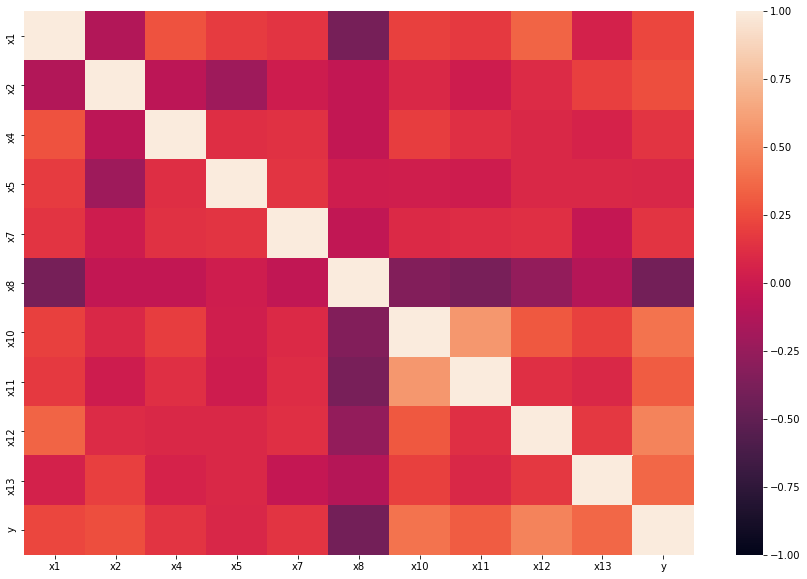

In [26]:
#Now we are going to variables which are highly correlated either positively or negatively
cor=data.corr()
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(cor,vmin=-1)
#We can see that x11 and x10 are highly correated so we can remove one of them
data.drop(columns={"x11"},inplace=True)

In [27]:
# We got lots of variable with us. This occupies lot of space. We can either delte them or reduce their dimensions
#using dimensionality reduction algorithms like PCA, PGA, Autoencoders. I am using PCA here.
# One dosen't need to reduce the data here as it's too small but I am still doing it.
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
feed=data.iloc[:,:-1]
target=data.iloc[:,-1] #We have to seprate the target variable before reducing the dimension

In [30]:
reducer=PCA(n_components=4) # I am comofortable working with 4 variables. You can coose whatever you want.
# The more variables you the better it captures the underlying meaning of the data but it comes with storage tradeoff
reducer.fit(feed)
feed=reducer.transform(feed) # The obtained result is an array

In [36]:
final_feed=pd.DataFrame(feed)
final_feed.head() #We finally got our data. Now we can start fitting the models on it and picke the best one out.

,0,1,2,3
0,-13.310856,-10.560058,6.068956,6.325324
1,-29.993333,14.793655,-5.694298,3.567919
2,69.019620,-13.347102,-30.690110,9.529073
3,-35.897155,-19.783801,-2.448782,2.756785
4,-18.365313,-17.267780,-15.831129,9.443212


In [40]:
#Preparing the data
trainX,testX,trainY,testY=train_test_split(final_feed,target,test_size=0.2)

# Using Regression Models For Classification

In [49]:
from sklearn.linear_model import LinearRegression
model_LR=LinearRegression()
model_LR.fit(trainX,trainY)
results=(np.around(model_LR.predict(testX)))
results=results.astype("int")
from sklearn.metrics import classification_report
print(classification_report(results,testY))

              precision    recall  f1-score   support

           0       0.92      0.61      0.73        36
           1       0.56      0.90      0.69        20

    accuracy                           0.71        56
   macro avg       0.74      0.76      0.71        56
weighted avg       0.79      0.71      0.72        56



In [50]:
from sklearn.svm import SVR
model_SVR=SVR()
model_SVR.fit(trainX,trainY)
results=(np.around(model_SVR.predict(testX)))
results=results.astype("int")
print(classification_report(results,testY))

              precision    recall  f1-score   support

           0       0.88      0.62      0.72        34
           1       0.59      0.86      0.70        22

    accuracy                           0.71        56
   macro avg       0.73      0.74      0.71        56
weighted avg       0.76      0.71      0.72        56



In [51]:
from sklearn.ensemble import RandomForestRegressor
model_forest=RandomForestRegressor()
model_forest.fit(trainX,trainY)
results=(np.around(model_forest.predict(testX)))
results=results.astype("int")
print(classification_report(results,testY))

              precision    recall  f1-score   support

           0       0.71      0.65      0.68        26
           1       0.72      0.77      0.74        30

    accuracy                           0.71        56
   macro avg       0.71      0.71      0.71        56
weighted avg       0.71      0.71      0.71        56



# Classification Models

In [64]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier()
model_KNN.fit(trainX,trainY)
results=model_KNN.predict(testX)
print(classification_report(results,testY))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77        28
           1       0.75      0.86      0.80        28

    accuracy                           0.79        56
   macro avg       0.79      0.79      0.78        56
weighted avg       0.79      0.79      0.78        56



In [65]:
from sklearn.ensemble import RandomForestClassifier
model_for=RandomForestClassifier()
model_for.fit(trainX,trainY)
results=model_for.predict(testX)
print(classification_report(results,testY))

              precision    recall  f1-score   support

           0       0.75      0.69      0.72        26
           1       0.75      0.80      0.77        30

    accuracy                           0.75        56
   macro avg       0.75      0.75      0.75        56
weighted avg       0.75      0.75      0.75        56



In [66]:
from sklearn.svm import SVC
model_svc=SVC(kernel="rbf",C=10)
model_svc.fit(trainX,trainY)
results=model_svc.predict(testX)
print(classification_report(results,testY))

              precision    recall  f1-score   support

           0       0.83      0.69      0.75        29
           1       0.72      0.85      0.78        27

    accuracy                           0.77        56
   macro avg       0.78      0.77      0.77        56
weighted avg       0.78      0.77      0.77        56



### KNN is giving the best results on reduced data.
### Let's see if KNN performs equally well on the original data
# Classification using KNN and original data.

In [78]:
TrainX,TestX,TrainY,TestY=train_test_split(data.iloc[:,:-1],data.iloc[:,-1],test_size=0.2)
final_model=KNeighborsClassifier()
final_model.fit(TrainX,TrainY)
results=final_model.predict(TestX)
print(final_model.score(TrainX,TrainY))
print(classification_report(results,TestY))
#The testing and training accuracy vary 8 points. This is a clear case of overfitting. Model is tainted with high variance
# and low bias :)

0.7633928571428571
              precision    recall  f1-score   support

           0       0.78      0.69      0.74        36
           1       0.54      0.65      0.59        20

    accuracy                           0.68        56
   macro avg       0.66      0.67      0.66        56
weighted avg       0.70      0.68      0.68        56



In [72]:
# Point To Note: A model performing well on a particular dataset does not guarantee its success on other datasets. 

0.78125